Nama : Ichwan Rizky Wahyudin\
NIM : 1301213434\
Kelas : IF-45-09

# Demo Materi Teori Konvolusi (Spatial Filter)

In [27]:
import numpy as np
import matplotlib.pyplot as plt

In [28]:
citra = np.array([
    [0, 5, 5, 4, 4],
    [0, 0, 5, 4, 4],
    [1, 6, 1, 3, 3],
    [1, 6, 7, 2, 3],
    [1, 6, 7, 6, 6]
])

filter_konvolusi = np.array([
    [-2, -1,0],
    [-1, 0, 1],
    [0, 1, 2]
])

In [29]:
citra_padded = np.pad(citra, ((1, 1), (1, 1)), mode='constant')
result = np.zeros_like(citra)

In [30]:
def apply_convolution(citra_padded, filter_konvolusi):
    result = np.zeros_like(citra_padded)
    for i in range(citra_padded.shape[0] - 2): 
        for j in range(citra_padded.shape[1] - 2): 
            neighborhood = citra_padded[i:i+3, j:j+3] 
            convolution_result = np.sum(neighborhood * filter_konvolusi)
            result[i+1, j+1] = convolution_result
    return result[1:-1, 1:-1]

hasil_konvolusi = apply_convolution(citra_padded, filter_konvolusi)
print(hasil_konvolusi)


[[  5  15  12  11   0]
 [ 13   8  -4  -6 -13]
 [ 19  20   3  -4 -12]
 [ 18  18   2   9  -5]
 [  5  -2 -19 -17 -13]]


# Case Base

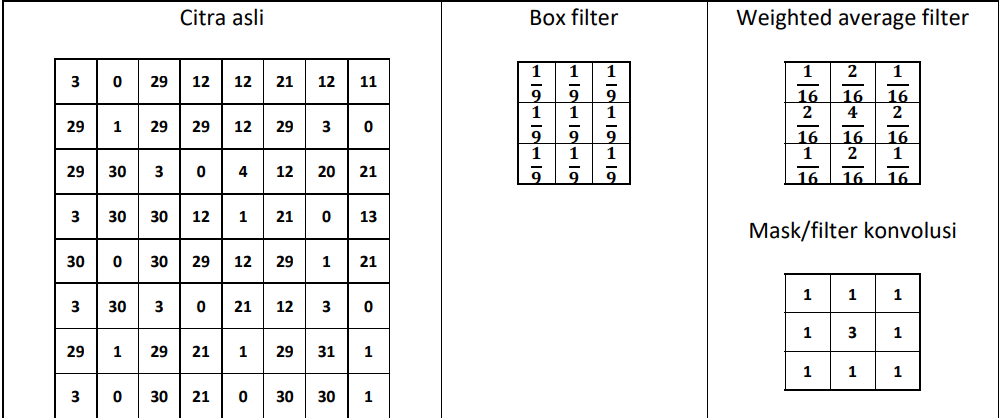

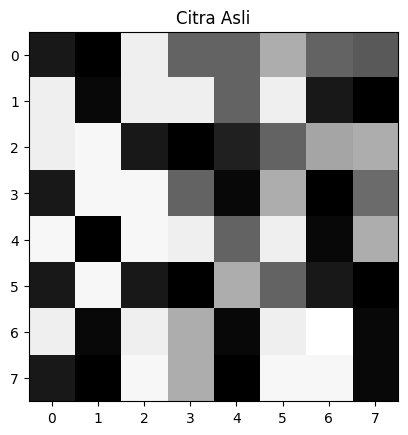

In [31]:
citra_asli = np.array([
    [3, 0, 29, 12, 12, 21, 12, 11],
    [29, 1, 29, 29, 12, 29, 3, 0],
    [29, 30, 3, 0, 4, 12, 20, 21],
    [3, 30, 30, 12, 1, 21, 0, 13],
    [30, 0, 30, 29, 12, 29, 1, 21],
    [3, 30, 3, 0, 21, 12, 3, 0],
    [29, 1, 29, 21, 1, 29, 31, 1],
    [3, 0, 30, 21, 0, 30, 30, 1]
])

box_filter = np.array([
    [1/9,1/9,1/9],
    [1/9,1/9,1/9],
    [1/9,1/9,1/9]
])

weighted_filter = np.array([
    [1/16,2/16,1/16],
    [2/16,4/16,2/16],
    [1/16,2/16,1/16]
])

filter_konvolusi = np.array([
    [1, 1, 1],
    [1, 3, 1],
    [1, 1, 1]
])

plt.imshow(citra_asli, cmap='gray')
plt.title('Citra Asli')
plt.show()

### Menggunakan filter Mask Konvlusi

In [32]:
citra_padded = np.pad(citra_asli, ((1, 1), (1, 1)), mode='constant')
hasil_konvolusi = apply_convolution(citra_padded, filter_konvolusi)
print(hasil_konvolusi)

print()
for i in range(hasil_konvolusi.shape[0]):
    for j in range(hasil_konvolusi.shape[1]):
        print(f'{hasil_konvolusi[i, j]}\t', end='')
    print()
print()

[[ 39  91 158 147 139 131 100  48]
 [150 155 191 188 155 183 135  67]
 [180 244 170 120 128 126 159  99]
 [128 245 224 145 122 142 138 102]
 [156 159 224 196 161 158 102  80]
 [ 99 215 149 146 196 163 133  57]
 [124 130 193 168 137 215 199  68]
 [ 39  92 162 144 102 181 182  65]]

39	91	158	147	139	131	100	48	
150	155	191	188	155	183	135	67	
180	244	170	120	128	126	159	99	
128	245	224	145	122	142	138	102	
156	159	224	196	161	158	102	80	
99	215	149	146	196	163	133	57	
124	130	193	168	137	215	199	68	
39	92	162	144	102	181	182	65	



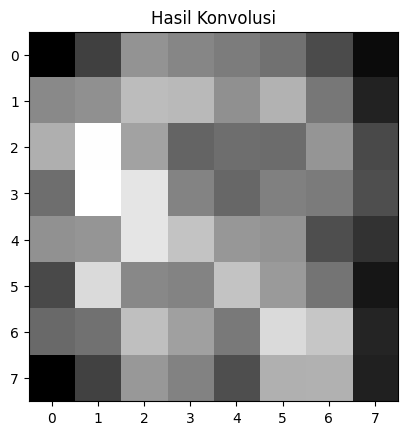

In [33]:
plt.imshow(hasil_konvolusi, cmap='gray')
plt.title('Hasil Konvolusi')
plt.show()

### Menggunakan Filter Box Filter

In [34]:
citra_padded = np.pad(citra_asli, ((1, 1), (1, 1)), mode='constant')
hasil_konvolusi = apply_convolution(citra_padded, box_filter)
print(hasil_konvolusi)

print()
for i in range(hasil_konvolusi.shape[0]):
    for j in range(hasil_konvolusi.shape[1]):
        print(f'{hasil_konvolusi[i, j]}\t', end='')
    print()
print()

[[ 3 10 11 13 12  9  8  2]
 [10 16 14 14 14 13 14  7]
 [13 20 18 13 13 11 13  6]
 [13 20 18 13 13 11 15  8]
 [10 17 18 15 15 11 11  4]
 [10 17 15 16 17 15 14  6]
 [ 7 14 15 14 14 17 15  7]
 [ 3 10 11 11 11 13 13  6]]

3	10	11	13	12	9	8	2	
10	16	14	14	14	13	14	7	
13	20	18	13	13	11	13	6	
13	20	18	13	13	11	15	8	
10	17	18	15	15	11	11	4	
10	17	15	16	17	15	14	6	
7	14	15	14	14	17	15	7	
3	10	11	11	11	13	13	6	



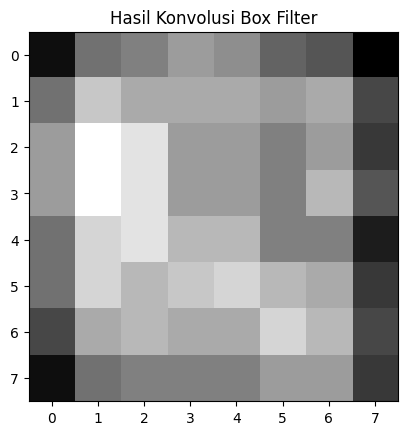

In [35]:
plt.imshow(hasil_konvolusi, cmap='gray')
plt.title('Hasil Konvolusi Box Filter')
plt.show()

### Menggunakan weight average

In [36]:
citra_padded = np.pad(citra_asli, ((1, 1), (1, 1)), mode='constant')
hasil_konvolusi = apply_convolution(citra_padded, weighted_filter)
print(hasil_konvolusi)

print()
for i in range(hasil_konvolusi.shape[0]):
    for j in range(hasil_konvolusi.shape[1]):
        print(f'{hasil_konvolusi[i, j]}\t', end='')
    print()
print()

[[ 4  7 14 14 12 12  9  4]
 [13 15 17 16 15 16 12  6]
 [16 21 16 10  9 13 13  9]
 [13 21 20 13 10 12 12  9]
 [12 17 19 17 15 14  9  7]
 [11 15 15 13 15 16 11  5]
 [10 13 17 15 13 19 18  6]
 [ 4  7 15 13  9 16 17  6]]

4	7	14	14	12	12	9	4	
13	15	17	16	15	16	12	6	
16	21	16	10	9	13	13	9	
13	21	20	13	10	12	12	9	
12	17	19	17	15	14	9	7	
11	15	15	13	15	16	11	5	
10	13	17	15	13	19	18	6	
4	7	15	13	9	16	17	6	



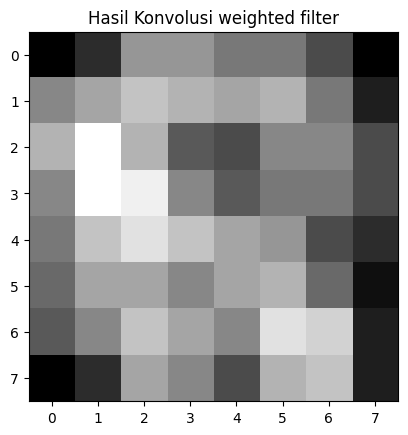

In [37]:
plt.imshow(hasil_konvolusi, cmap='gray')
plt.title('Hasil Konvolusi weighted filter')
plt.show()

### Menggunakan median filter

In [38]:
def medianFilter(image, size):
    height, width = image.shape
    pad_size = size // 2
    padded_image = np.pad(image, pad_size, mode='edge')

    result = np.zeros_like(image)

    for i in range(height):
        for j in range(width):
            neighborhood = padded_image[i:i+size, j:j+size]
            result[i, j] = np.median(neighborhood)

    return result

hasil_median = medianFilter(citra_asli, 3)
print(hasil_median)

print()
for i in range(hasil_median.shape[0]):
    for j in range(hasil_median.shape[1]):
        print(f'{hasil_median[i, j]}\t', end='')
    print()
print()

[[ 3  3 12 12 12 12 12 11]
 [29 29 12 12 12 12 12 11]
 [29 29 29 12 12 12 13 13]
 [29 30 29 12 12 12 20 20]
 [ 3 30 29 12 12 12 12  3]
 [29 29 21 21 21 12 12  1]
 [ 3  3 21 21 21 21 12  1]
 [ 3  3 21 21 21 30 30  1]]

3	3	12	12	12	12	12	11	
29	29	12	12	12	12	12	11	
29	29	29	12	12	12	13	13	
29	30	29	12	12	12	20	20	
3	30	29	12	12	12	12	3	
29	29	21	21	21	12	12	1	
3	3	21	21	21	21	12	1	
3	3	21	21	21	30	30	1	



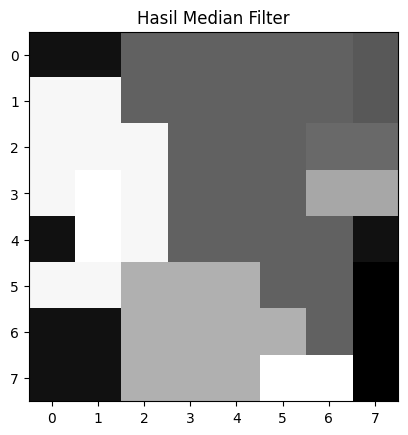

In [39]:
plt.imshow(hasil_median, cmap='gray')
plt.title('Hasil Median Filter')
plt.show()

In [40]:
# Menggunakan Scipy
from scipy.ndimage import median_filter
hasil_median_filter = median_filter(citra_asli, size=3)
print(hasil_median_filter)

[[ 3  3 12 12 12 12 12 11]
 [29 29 12 12 12 12 12 11]
 [29 29 29 12 12 12 13 13]
 [29 30 29 12 12 12 20 20]
 [ 3 30 29 12 12 12 12  3]
 [29 29 21 21 21 12 12  1]
 [ 3  3 21 21 21 21 12  1]
 [ 3  3 21 21 21 30 30  1]]


### Menggunakan max filter

In [41]:
def maxFilter(image, size):
    height, width = image.shape
    pad_size = size // 2
    padded_image = np.pad(image, pad_size, mode='constant')

    result = np.zeros_like(image)

    for i in range(height):
        for j in range(width):
            neighborhood = padded_image[i:i+size, j:j+size]
            result[i, j] = np.max(neighborhood)

    return result

hasil_max = maxFilter(citra_asli, 3)
print(hasil_max)

print()
for i in range(hasil_max.shape[0]):
    for j in range(hasil_max.shape[1]):
        print(f'{hasil_max[i, j]}\t', end='')
    print()
print()

[[29 29 29 29 29 29 29 12]
 [30 30 30 29 29 29 29 21]
 [30 30 30 30 29 29 29 21]
 [30 30 30 30 29 29 29 21]
 [30 30 30 30 29 29 29 21]
 [30 30 30 30 29 31 31 31]
 [30 30 30 30 30 31 31 31]
 [29 30 30 30 30 31 31 31]]

29	29	29	29	29	29	29	12	
30	30	30	29	29	29	29	21	
30	30	30	30	29	29	29	21	
30	30	30	30	29	29	29	21	
30	30	30	30	29	29	29	21	
30	30	30	30	29	31	31	31	
30	30	30	30	30	31	31	31	
29	30	30	30	30	31	31	31	



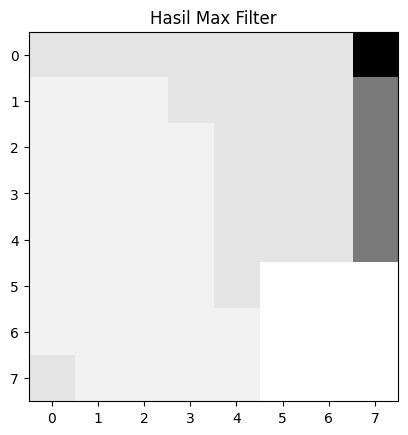

In [42]:
plt.imshow(hasil_max, cmap='gray')
plt.title('Hasil Max Filter')
plt.show()

In [43]:
# Menggunakan scipy
from scipy.ndimage import maximum_filter
hasil_max_filter = maximum_filter(citra_asli, size=3)
print(hasil_max_filter)

[[29 29 29 29 29 29 29 12]
 [30 30 30 29 29 29 29 21]
 [30 30 30 30 29 29 29 21]
 [30 30 30 30 29 29 29 21]
 [30 30 30 30 29 29 29 21]
 [30 30 30 30 29 31 31 31]
 [30 30 30 30 30 31 31 31]
 [29 30 30 30 30 31 31 31]]


### Menggunakan min filter

In [44]:
def minFilter(image, size):
    output = np.copy(image)
    height, width = image.shape
    pad = size // 2
    padded_image = np.pad(image, ((pad, pad), (pad, pad)), mode='constant')
    for i in range(pad, height+pad):
        for j in range(pad, width+pad):
            output[i-pad, j-pad] = np.min(padded_image[i-pad:i+pad+1, j-pad:j+pad+1])
    return output

hasil_min = minFilter(citra_asli, size=3)
print(hasil_min)

print()
for i in range(hasil_min.shape[0]):
    for j in range(hasil_min.shape[1]):
        print(f'{hasil_min[i, j]}\t', end='')
    print()
print()

[[0 0 0 0 0 0 0 0]
 [0 0 0 0 0 3 0 0]
 [0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]]

0	0	0	0	0	0	0	0	
0	0	0	0	0	3	0	0	
0	1	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	
0	0	0	0	0	1	0	0	
0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	



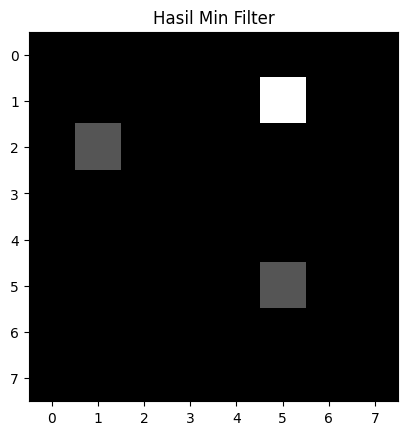

In [45]:
plt.imshow(hasil_min, cmap='gray')
plt.title('Hasil Min Filter')
plt.show()